# Board Game Geek New Ranking 
The aim of this project is to analyze the current rankin system of board game geek and give a better and personalized ranked list of board games

First thing let's setup

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import ttk, messagebox
import os 
import sys
sys.path.append(r"C:\Users\aless\OneDrive\Documenti\GitHub\Python-Project") 
from Librarian.models import choose_option


In this case I imported a library called "tkinter" that is usefull to obtain user imput in a dynamic way but unfortunately it's not compatible with Jupyter Notebook so, just to show how my code works, I will sett the variable manually.

Now let's load the data 

In [20]:
#base_path = os.path.dirname(__file__) 
#file_path = os.path.join(base_path, "../data/BGG_Data_Set.xlsx") 
#data = pd.read_excel(file_path)
data=pd.read_excel(r"C:\Users\aless\OneDrive\Documenti\GitHub\Python-Project\Data\BGG_Data_Set.xlsx")


I used this way to find the file path beacuse i think it's the safiest way to avoid errors. First we use "__file__" to retirve the path to the current script and then we add "data/BGG_Data_set" to complete the file path and read the file.
unfortunately it doesn't work on jupyter notebook so i will manually ad the path 
 

## Data Cleaning 
Cleaning a database is an essential passage to ensure our analysis is valid and meaningfull



In [21]:
C_data = data.drop(columns=["Owned Users"])
C_data = C_data.drop(columns=["Mechanics"])
C_data = C_data.drop(columns=["Domains"]) #I saw this colum misses a lot of data
#dropping rows with missing values
C_data = C_data.dropna()  
#dropping wrong values 
C_data = C_data[C_data["Min Players"] > 0] 
C_data = C_data[C_data["Year Published"] > 0] 
C_data = C_data[C_data["Max Players"] > 0]
C_data = C_data[(C_data["Play Time"] > 0) & (C_data["Play Time"] < 10000)]
C_data = C_data[(C_data["Min Age"] > 0) & (C_data["Min Age"] < 99)]
C_data = C_data[C_data["Users Rated"] > 0]
C_data = C_data[(C_data["Rating Average"] > 0) & (C_data["Rating Average"] < 10)]
C_data = C_data[(C_data["Complexity Average"] > 0) & (C_data["Complexity Average"] <= 5)] #in BGG complexity sacles 1-5

First thing we drop the collumns that are not meaningfull for our analysis in this case "Owned Users", "Mechanics", "Domains". Then we drop all the rows with missing values. 
Last thing we check for the correctness of the data, so we filter negative numbers, eccessive high numbers and ratings outside the scale 

## Analysis part 
If we want to create a new meaningfull rating we nedd to understand if there are some correletion between the old rank and other factors. 
I personally Know pretty weel the BoardGameGeek site and the Board game commiunity; my hypothesis is that games with a medium-hight complexity factor are ranked higher.
I think this for two main reasons: first an essential part of board games is replayability and usually games with lower difficult rating are less replayable or more random; second the typical board game enjoyer likes to challenge himself with more difficult games, so the votes can be biased 

In [22]:
correlation = C_data["BGG Rank"].corr(C_data["Complexity Average"])
print(f"Rank-Complexity correlation: {correlation:.2f}") 

correlation = C_data["BGG Rank"].corr(C_data["Users Rated"])
print(f"Rank-Users rated correlation: {correlation:.2f}")

correlation = C_data["BGG Rank"].corr(C_data["Play Time"])
print(f"Rank-Playtime correlation: {correlation:.2f}") 
correlation = C_data["BGG Rank"].corr(C_data["Year Published"])
print(f"Rank-year of pubblication correlation: {correlation:.2f}")

correlation = C_data["BGG Rank"].corr(C_data["Max Players"])
print(f"Rank-Max players correlation: {correlation:.2f}")

correlation = C_data["BGG Rank"].corr(C_data["Min Players"])
print(f"Rank-Min players correlation: {correlation:.2f}") 

correlation = C_data["BGG Rank"].corr(C_data["Rating Average"])
print(f"Rank-Rating correlation: {correlation:.2f}") 

Rank-Complexity correlation: -0.38
Rank-Users rated correlation: -0.31
Rank-Playtime correlation: -0.10
Rank-year of pubblication correlation: -0.10
Rank-Max players correlation: 0.02
Rank-Min players correlation: 0.10
Rank-Rating correlation: -0.75


As we can see there is an obvious negative correlation between rank and rating, this means that the higher the rating the lower is the rank and it's right beacuse in the ranking system the lower a rank is the more important it is.
We can see that the complexity has a meaningfull correlation, -0.38 isn't much but it is not nothing either; we can definitively say that the complexity of a game is important and impats the ranking.
As expected the users rated is correlated too, this is not a surprise because we now that the BoardGameGeek ranking is a Bayesian mean so the number of voters is important
Other factors like year of pubblication or playtime haven't a meaningfull correlation 

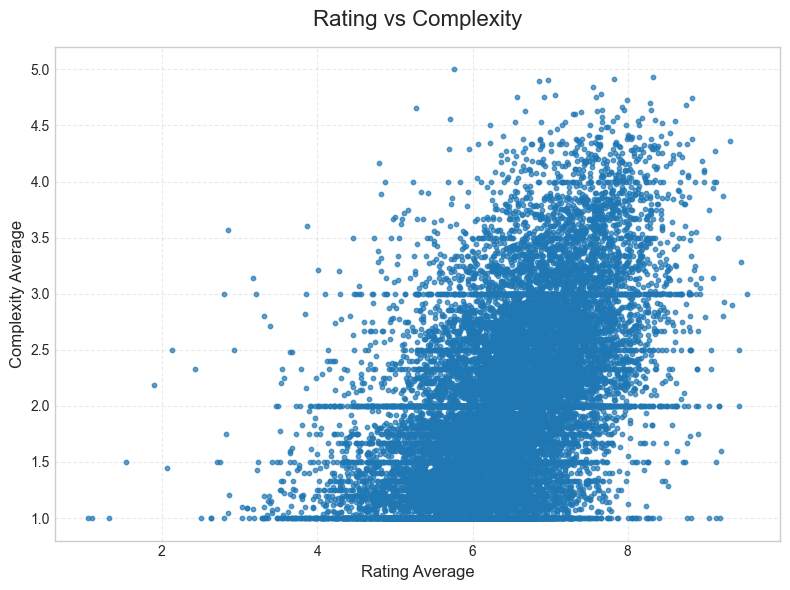

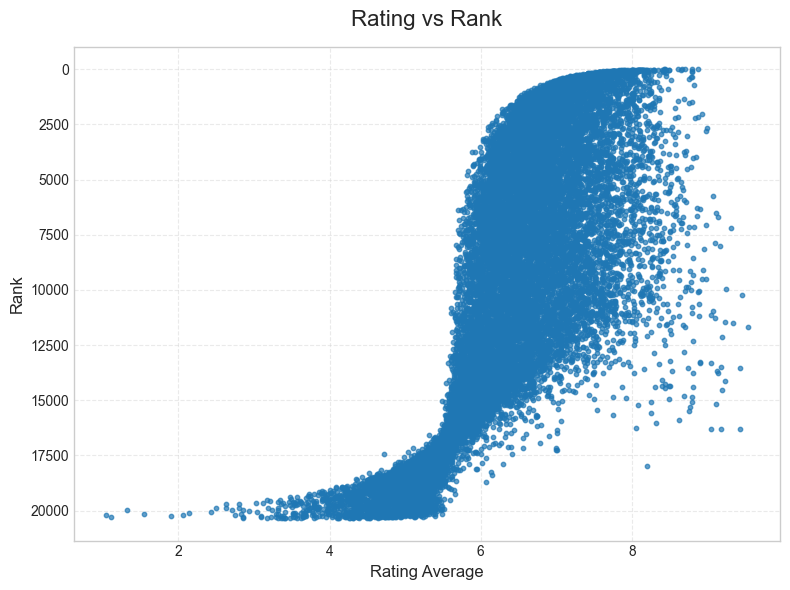

In [23]:
plt.figure(figsize=(8, 6))

plt.scatter(
    C_data["Rating Average"],
    C_data["Complexity Average"],
    alpha=0.7,
    s=10,   # point dimension     
)

plt.title("Rating vs Complexity", fontsize=16, pad=15)
plt.xlabel("Rating Average", fontsize=12)
plt.ylabel("Complexity Average", fontsize=12)


plt.grid(  #graphic grid  
    True,
    linestyle='--',
    alpha=0.4
)

plt.style.use("seaborn-v0_8-whitegrid") #applaying a cleaner style 

plt.tight_layout()
plt.show()

#2
plt.figure(figsize=(8, 6))

plt.scatter(
    C_data["Rating Average"],
    C_data["BGG Rank"],
    alpha=0.7,
    s=10,               
)

plt.title("Rating vs Rank", fontsize=16, pad=15)
plt.xlabel("Rating Average", fontsize=12)
plt.ylabel("Rank", fontsize=12)

plt.gca().invert_yaxis()  

plt.grid(
    True,
    linestyle='--',
    alpha=0.4
)

plt.style.use("seaborn-v0_8-whitegrid")

plt.tight_layout()
plt.show()

The first graph let us see what we just found in the correlation analysis, we can clearly see that the more the complexity indec rises the higher is the rating and consequently the ranking.
It's intresting to point out that in correspondence of an exact value like 2.0 or 1.5 we can see an increase in dots; BoardGamesGeek allows you to vote just 1,2,3,4 or 5 for complexity, not in the middle, so it's normal that for the games with a lower number of votes have a round score. It's also true that if you see a game with 2.99 complexity rating it is more likely that you vote 3 to fit into the average vote 
The second graph let us see an intresting fact, we can see what the community considers the minimum level of acceptability for a game. Under the 5.5 out of 10 vote a game is considered really bad and as a very high rank, but past this threshold we can see that even modest games with rating 6 or even lower can reach a fairly high rank

## Creating a personalized ranking 
The main focus of this project is to create a new personalized ranking based on the singular user and to do so i used a pack called tkinter that allows me to create a box with multiple values and to save the user choice into a variable 

In [24]:
import tkinter as tk
from tkinter import ttk, messagebox

def choose_option(options):
    root = tk.Tk()  # creates the window 
    root.title("Choose an option")

    token = tk.StringVar()  # variable to save the choice

    def confirm():
        option = combo.get()
        if option:
            token.set(option)
            root.destroy()
        else:
            messagebox.showwarning("Attention", "Choose an option before clicking confirm!")

    # UI
    tk.Label(root, text="Choose from the following:", font=("Arial", 12)).pack(pady=10)

    combo = ttk.Combobox(root, values=options, state="readonly")
    combo.pack(pady=5)

    tk.Button(root, text="Confirm", command=confirm).pack(pady=10)

    root.mainloop()  # keeps the window open until root.destroy()

    return token.get()  # return the final value

this is the function i create to let the user choose from a list and returns the chosen value, as said I cannot use this in Jupyter notebook so i will write the value 

In [25]:
years=["after 1980","after 1990","after 2000", "after 2010","every Year"]
#chosen_year=choose_option(years)
chosen_year="after 1990"
min_players=["at least 1 min player","at least 2 min players","at least 3 min players",
             "at least 4 min players","any min players"]
#chosen_min_players=choose_option(min_players)
chosen_min_players="at least 2 min players"
max_players=["1 max player","2 max players","3 max players","4 max players","5 max players",
             "6 max players","7 max players","8 max players","9 max players","10 max players",
             "any max players"]
#chosen_max_players=choose_option(max_players)
chosen_max_players="8 max players"
complexity=["easy", "medium","hard", "every difficulty"]
#chosen_complexity=choose_option(complexity)
chosen_complexity="medium"

And then I used if statement to filter the database according to the user liking 

In [26]:
if chosen_year == "after 1980":
   C_data=C_data[C_data["Year Published"]>= 1980]
elif chosen_year == "after 1990":
   C_data=C_data[C_data["Year Published"]>= 1990]
elif chosen_year == "after 2000":
   C_data=C_data[C_data["Year Published"]>= 2000]
elif chosen_year == "after 2010":
   C_data=C_data[C_data["Year Published"]>= 2010]
elif chosen_year == "every year":
   pass 

if chosen_min_players == "at least 1 min player":
   C_data=C_data[C_data["Min Players"]>= 1]
elif chosen_min_players == "at least 2 min players":
   C_data=C_data[C_data["Min Players"]>= 2]
elif chosen_min_players == "at least 3 min players":
   C_data=C_data[C_data["Min Players"]>= 3]
elif chosen_min_players == "at least 4 min players":
   C_data=C_data[C_data["Min Players"]>= 4]
elif chosen_min_players == "any min players":
    pass

if chosen_max_players == "1 max player":
   C_data=C_data[C_data["Max Players"]<= 1]
elif chosen_max_players == "2 max players":
   C_data=C_data[C_data["Max Players"]<= 2]
elif chosen_max_players == "3 max players":
   C_data=C_data[C_data["Max Players"]<= 3]
elif chosen_max_players == "4 max players":
   C_data=C_data[C_data["Max Players"]<= 4]
elif chosen_max_players == "5 max players":
   C_data=C_data[C_data["Max Players"]<= 5]
elif chosen_max_players == "6 max players":
   C_data=C_data[C_data["Max Players"]<= 6]
elif chosen_max_players == "7 max players":
   C_data=C_data[C_data["Max Players"]<= 7]
elif chosen_max_players == "8 max players":
   C_data=C_data[C_data["Max Players"]<= 8]
elif chosen_max_players == "9 max players":
   C_data=C_data[C_data["Max Players"]<= 9]
elif chosen_max_players == "10 max players":
   C_data=C_data[C_data["Max Players"]<= 10]
elif chosen_max_players == "any max players":
    pass

if chosen_complexity == "easy":
   C_data=C_data[C_data["Complexity Average"] < 2]
elif chosen_complexity == "medium":
   C_data=C_data[(C_data["Complexity Average"] > 1.75) & (C_data["Complexity Average"] < 3.50)]
elif chosen_complexity == "hard":
   C_data=C_data[C_data["Complexity Average"] > 3.25]
elif chosen_complexity == "every difficulty":
    pass

Now that we have our filtered database we need to rank the games inside it
I chose to use a Bayesian mean because it's an effective way to rank not only by mean vote but also by number of votes so we can avoid games with one ten being the first in the ranking 

## Bayesian mean theory 


The bayesian mean is a way to calculate mean taking into account the value of the votes and the numbers of votes.
the formula is:
$$
\text{bayesian mean} = \frac{C \cdot m + n \cdot \bar{x}}{C + n}
$$
where:
$$
m = \text{overall mean}\\ 
C = \text {overall mean weight}\\
n = \text {numbers of real ratingsfor the item}\\
\bar{x} = \text{sample mean of the item's ratings}\\
$$

And i implemented this mean in python with this code

In [29]:
m = C_data["Rating Average"].mean()

C = C_data["Users Rated"].median() 

C_data["Bayes Rating"] = (
    (C_data["Users Rated"] / (C_data["Users Rated"] + C)) * C_data["Rating Average"] +
    (C / (C_data["Users Rated"] + C)) * m
)

#New order
C_data_sorted = C_data.sort_values(by="Bayes Rating", ascending=False)

print(C_data_sorted.head)

<bound method NDFrame.head of              ID                                             Name  \
52     266507.0         Clank! Legacy: Acquisitions Incorporated   
136    246900.0              Eclipse: Second Dawn for the Galaxy   
1      161936.0                        Pandemic Legacy: Season 1   
327    314040.0                        Pandemic Legacy: Season 0   
315    186751.0                         Mythic Battles: Pantheon   
...         ...                                              ...   
20247    4367.0                                             Nero   
20251   10715.0  CSI: Crime Scene Investigation - The Board Game   
20274   24959.0                                   Lost: The Game   
20259    2502.0                                  Global Survival   
20281  232895.0                                     Coaster Park   

       Year Published  Min Players  Max Players  Play Time  Min Age  \
52             2019.0            2            4        120       13   
136        

So we obtain new ranking based on what the user likes